# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></div><div class="lev1 toc-item"><a href="#Scikit-Learn" data-toc-modified-id="Scikit-Learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scikit-Learn</a></div><div class="lev1 toc-item"><a href="#H2O" data-toc-modified-id="H2O-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>H2O</a></div><div class="lev2 toc-item"><a href="#RandomForest" data-toc-modified-id="RandomForest-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RandomForest</a></div><div class="lev2 toc-item"><a href="#GLM" data-toc-modified-id="GLM-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>GLM</a></div><div class="lev1 toc-item"><a href="#PyMC3" data-toc-modified-id="PyMC3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PyMC3</a></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Data Exploration 

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,505.0,3.620667,8.608572,0.00906,0.08221,0.25915,3.67822,88.9762
avg_number_of_rooms,505.0,6.284059,0.703195,3.56100,5.88500,6.20800,6.62500,8.7800
distance_to_employment_centers,505.0,3.794459,2.107757,1.12960,2.10000,3.19920,5.21190,12.1265
property_tax_rate,505.0,408.459406,168.629992,187.00000,279.00000,330.00000,666.00000,711.0000
pupil_teacher_ratio,505.0,18.461782,2.162520,12.60000,17.40000,19.10000,20.20000,22.0000
house_value,505.0,22.529901,9.205991,5.00000,17.00000,21.20000,25.00000,50.0000


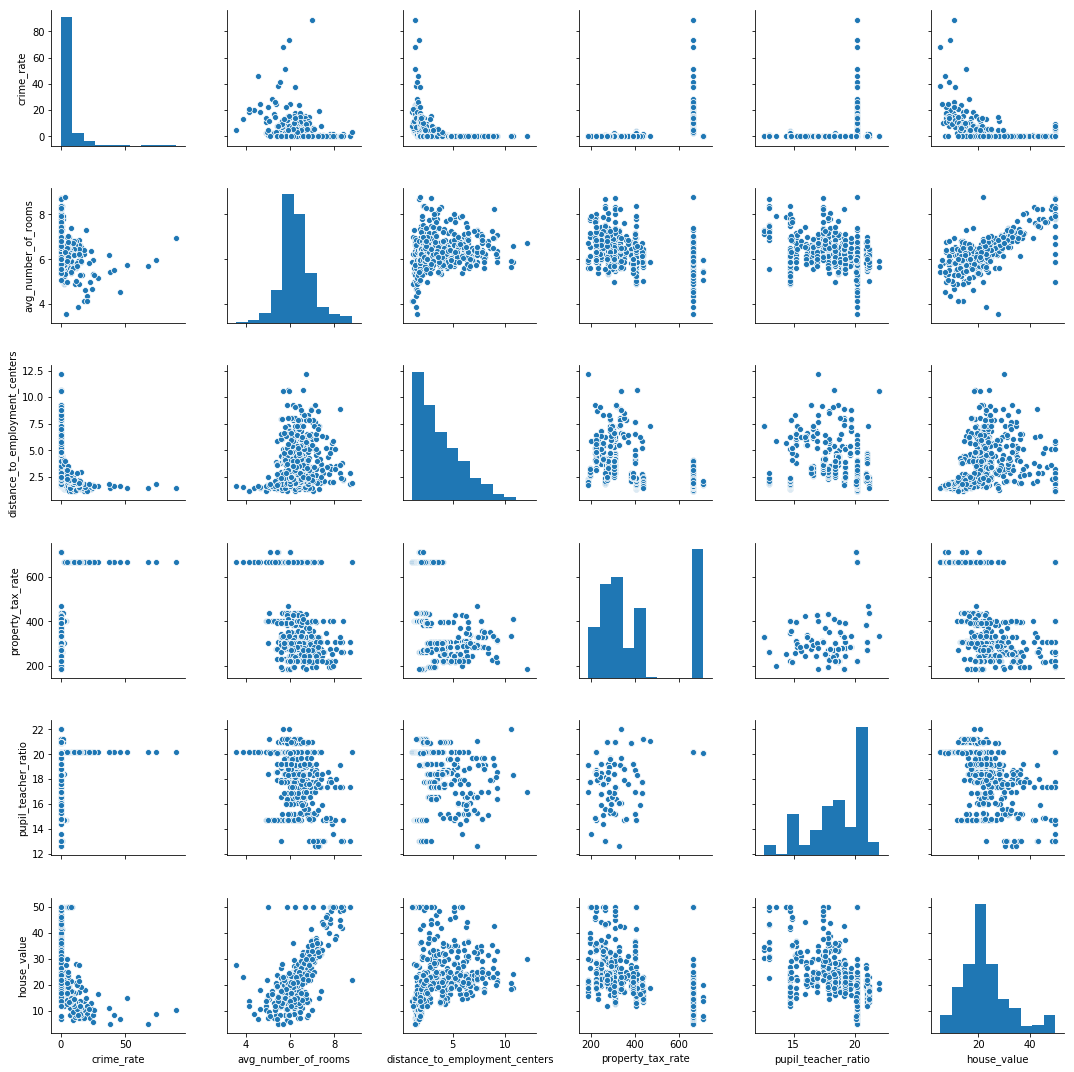

In [5]:
sns.pairplot(df);

In [6]:
X, y = df[df.columns.difference(['house_value'])], df.house_value

In [7]:
test_X = X.mean(axis=0).values
test_X

array([  6.28405941,   3.62066653,   3.79445861, 408.45940594,
        18.46178218])

# Scikit-Learn 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
lr = LinearRegression(normalize=True, n_jobs=-1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [12]:
y_predict = lr.predict(X_test)
y_predict_sklearn = lr.predict(X)
y_true_sklearn = y

In [13]:
np.sqrt(mean_squared_error(y_true_sklearn, y_predict_sklearn))

5.791467814588063

In [52]:
with open('model_sklearn.pkl', 'wb') as f:
    model = {'model': lr, 'std_err': np.sqrt(mean_squared_error(y_true_sklearn, y_predict_sklearn))}
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
lr.intercept_

-6.226410639104547

In [16]:
lr.predict(np.atleast_2d(test_X))[0]

22.620155155594176

In [68]:
test_X

array([  6.28405941,   3.62066653,   3.79445861, 408.45940594,
        18.46178218])

In [17]:
test_y = lr.intercept_+test_X.dot(lr.coef_)
test_y

22.620155155594176

# H2O 

In [18]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-0ubuntu0.16.04.1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8_89l3bf
  JVM stdout: /tmp/tmp8_89l3bf/h2o_jpsilva_started_from_python.out
  JVM stderr: /tmp/tmp8_89l3bf/h2o_jpsilva_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_jpsilva_qf6yri
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [19]:
frame = h2o.import_file('housing.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [20]:
frame

crime_rate,avg_number_of_rooms,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio,house_value
0.02731,6.421,4.9671,242,17.8,21.6
0.02729,7.185,4.9671,242,17.8,34.7
0.03237,6.998,6.0622,222,18.7,33.4
0.06905,7.147,6.0622,222,18.7,36.2
0.02985,6.43,6.0622,222,18.7,28.7
0.08829,6.012,5.5605,311,15.2,22.9
0.14455,6.172,5.9505,311,15.2,27.1
0.21124,5.631,6.0821,311,15.2,16.5
0.17004,6.004,6.5921,311,15.2,18.9
0.22489,6.377,6.3467,311,15.2,15


## RandomForest 

In [21]:
rf = H2ORandomForestEstimator(nfolds=10)

In [22]:
rf.train(y='house_value', training_frame=frame)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [23]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1540774097718_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 21.18725559688006
RMSE: 4.602961611493198
MAE: 2.957745956652934
RMSLE: 0.20338736751146289
Mean Residual Deviance: 21.18725559688006

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 20.052781427719978
RMSE: 4.478033209760729
MAE: 2.98382521106229
RMSLE: 0.200922491145308
Mean Residual Deviance: 20.052781427719978
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
mae,2.9742577,0.3436893,2.5888653,2.9456236,2.0487883,3.7321417,3.2253344,2.766511,3.7228918,3.1631827,2.7836607,2.7655785
mean_residual_deviance,19.792923,6.5812683,12.115816,17.337938,8.015582,35.03218,30.69909,14.953737,31.943537,23.936697,11.748634,12.146013
mse,19.792923,6.5812683,12.115816,17.337938,8.015582,35.03218,30.69909,14.953737,31.943537,23.936697,11.748634,12.146013
r2,0.7623993,0.0567760,0.7904831,0.8551027,0.8705969,0.6382311,0.7689673,0.7136566,0.6795027,0.6587358,0.81321,0.8355061
residual_deviance,19.792923,6.5812683,12.115816,17.337938,8.015582,35.03218,30.69909,14.953737,31.943537,23.936697,11.748634,12.146013
rmse,4.325944,0.7345508,3.480778,4.163885,2.8311803,5.918799,5.5406756,3.8670063,5.651861,4.892514,3.427628,3.4851131
rmsle,0.1967009,0.0256334,0.2267836,0.1654488,0.1163245,0.2186666,0.2123636,0.2066177,0.2458212,0.2053744,0.2093215,0.1602873


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2018-10-28 19:48:24,3.456 sec,0.0,nan,nan,nan
,2018-10-28 19:48:24,3.469 sec,1.0,7.0020066,4.7852694,49.0280959
,2018-10-28 19:48:24,3.476 sec,2.0,6.4956974,4.1026236,42.1940847
,2018-10-28 19:48:24,3.482 sec,3.0,6.4518045,4.1222471,41.6257818
,2018-10-28 19:48:24,3.489 sec,4.0,5.3515249,3.6410807,28.6388185
---,---,---,---,---,---,---
,2018-10-28 19:48:24,3.814 sec,46.0,4.6480406,2.9913811,21.6042814
,2018-10-28 19:48:24,3.823 sec,47.0,4.6309488,2.9818064,21.4456866
,2018-10-28 19:48:24,3.831 sec,48.0,4.6162437,2.9711245,21.3097063
,2018-10-28 19:48:24,3.836 sec,49.0,4.6150825,2.9691497,21.2989868



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
avg_number_of_rooms,538415.1875000,1.0,0.3949828
pupil_teacher_ratio,215857.7968750,0.4009133,0.1583539
property_tax_rate,210814.1875000,0.3915458,0.1546539
distance_to_employment_centers,202649.9843750,0.3763824,0.1486646
crime_rate,195398.4843750,0.3629141,0.1433449


In [24]:
test_data = {k:v for k,v in zip(X.columns.tolist(), test_X)}
test_frame = h2o.H2OFrame(test_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
y_predict_h2o = rf.predict(frame).as_data_frame()
y_true_h2o = y

drf prediction progress: |████████████████████████████████████████████████| 100%


In [26]:
np.sqrt(mean_squared_error(y_true_h2o, y_predict_h2o))

2.9304805264499674

In [27]:
rf.rmse(train=True, xval=True)

{'train': 4.602961611493198, 'xval': 4.478033209760729}

## GLM 

In [28]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [29]:
glm = H2OGeneralizedLinearEstimator(nfolds=10)

In [30]:
glm.train(y='house_value', training_frame=frame)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [31]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1540774097718_2


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 33.26118256770706
RMSE: 5.767250867415693
MAE: 3.799320788960675
RMSLE: 0.364821617366834
R^2: 0.606760250504143
Mean Residual Deviance: 33.26118256770706
Null degrees of freedom: 504
Residual degrees of freedom: 499
Null deviance: 42714.138685689206
Residual deviance: 16796.897196692065
AIC: 3216.845387871385

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 34.226357175375995
RMSE: 5.850329663820322
MAE: 3.8582090653142687
RMSLE: 0.46318735643206754
R^2: 0.5953492003958916
Mean Residual Deviance: 34.226357175375995
Null degrees of freedom: 504
Residual degrees of freedom: 499
Null deviance: 42943.44990834099
Residual deviance: 17284.310373564876
AIC: 3231.290911106982
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
mae,3.857993,0.5821367,3.0997956,4.681547,3.1974804,3.6755397,3.6890063,2.5759747,4.546972,5.3343983,3.286946,4.4922676
mean_residual_deviance,34.020203,12.2808695,16.910696,45.28185,17.059061,19.016277,36.657368,11.853327,59.552864,59.188965,25.545126,49.136486
mse,34.020203,12.2808695,16.910696,45.28185,17.059061,19.016277,36.657368,11.853327,59.552864,59.188965,25.545126,49.136486
null_deviance,4294.345,1246.378,5432.92,3886.6243,1591.7155,3594.0427,4736.4463,2522.71,3572.414,8278.909,3713.354,5614.315
r2,0.5837275,0.1064916,0.8316245,0.4685435,0.5355976,0.7721351,0.5500205,0.7265618,0.2971158,0.5666212,0.6046321,0.4844227
residual_deviance,1728.431,666.7089,913.17755,1856.5558,716.4806,817.6999,2052.8125,628.2263,2501.2202,3492.149,1456.0723,2849.9163
rmse,5.6304317,1.0766717,4.112262,6.729179,4.130262,4.3607655,6.054533,3.442866,7.71705,7.6934366,5.054219,7.0097423
rmsle,0.3934352,0.1961922,0.2491810,1.1424868,0.2163002,0.2374289,0.3731387,0.1933103,0.3242792,0.3711884,0.2065422,0.6204959


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-28 19:48:25,0.000 sec,0,42714.1384950,84.5824525


/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


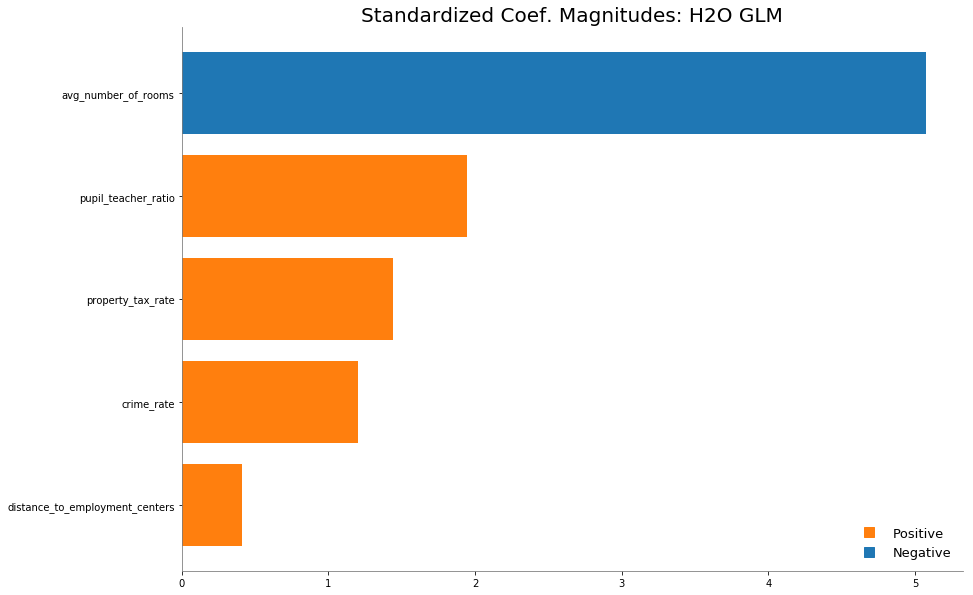

In [32]:
glm.std_coef_plot()

In [33]:
glm.coef()

{'Intercept': -1.4628802351100738,
 'crime_rate': -0.1396336179500851,
 'avg_number_of_rooms': 7.213444352993998,
 'distance_to_employment_centers': -0.19494817423740243,
 'property_tax_rate': -0.008558117463910749,
 'pupil_teacher_ratio': -0.8989380509611787}

In [34]:
glm.rmse()

5.767250867415693

# PyMC3 

In [35]:
from pymc3 import  *
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt

In [36]:
n_dim = X_train.shape[1]

# build model, fit, and check trace
with pm.Model() as model:
    # intercept
    alpha = pm.Normal('alpha', mu=0, sd=10)
    
    # coefficients (aka predictors)
    beta = pm.Normal('beta', mu=0, sd=10, shape=(n_dim,))
    
    mu = alpha + tt.dot(X, beta)
    sd = pm.HalfCauchy('sd', beta=10)
    y_model = pm.Normal('y', mu=mu, sd=sd, observed=y)

Sampling 4 chains: 100%|██████████| 36000/36000 [02:30<00:00, 239.81draws/s]
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


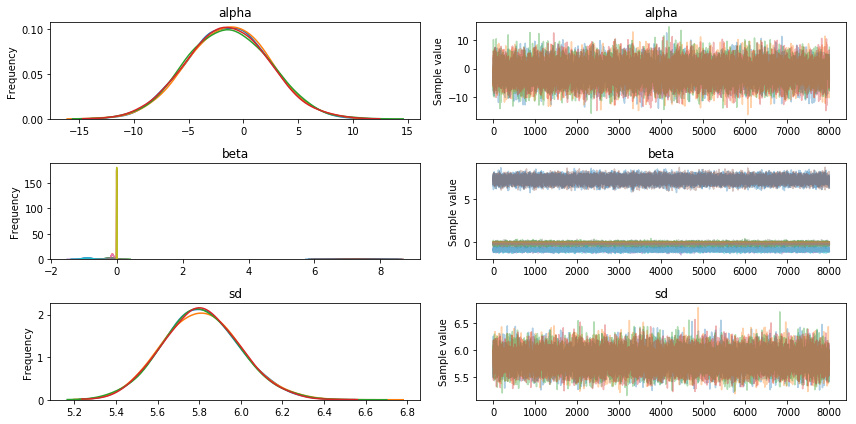

In [37]:
# inference
with model:
    trace = pm.sample(8000, tune=1000, cores=4)

pm.traceplot(trace);

In [38]:
intercept_pymc3 = trace.alpha.mean(axis=0)
coeff_pymc3 = trace.beta.mean(axis=0)

In [39]:
y_predict_pymc3 = intercept_pymc3+X.dot(coeff_pymc3)
y_true_pymc3 = y

In [40]:
np.sqrt(mean_squared_error(y_true_pymc3, y_predict_pymc3))

5.767105573225977

In [51]:
trace.sd.mean()

5.811831327773183

In [47]:
ppc['y'].shape

(200, 505)

100%|██████████| 1000/1000 [00:00<00:00, 1248.28it/s]


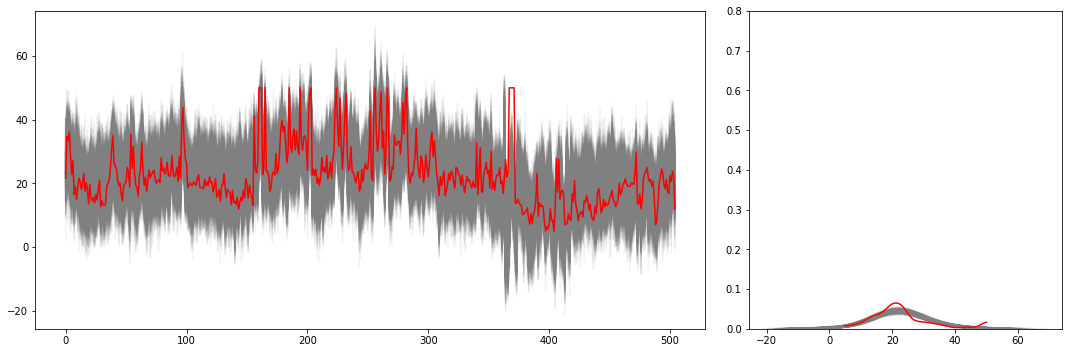

In [48]:
from matplotlib import gridspec

# posterior predictive checks on original data
ppc = pm.sample_ppc(trace, samples=1000, model=model)

def plot_predict(ppc_y, y):
    plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3)
    ax0 = plt.subplot(gs[0, 0:2])
    ax0.plot(ppc_y.T, color='gray', alpha=.1)
    ax0.plot(y, color='r')
    
    ax1 = plt.subplot(gs[0, 2])
    for ppc_i in ppc_y:
        pm.kdeplot(ppc_i, ax=ax1, color='gray', alpha=.1)
    pm.kdeplot(y, ax=ax1, color='r')
    plt.tight_layout()
    return ax0, ax1

ax0, ax1 = plot_predict(ppc['y'], y)
ax1.set_ylim(0, .8);

In [56]:
with open('model_pymc3.pkl', 'wb') as f:
    model = {'model': 'y ~ intercept+XT*coeffs', 'coeffs': coeff_pymc3, 'intercept': intercept_pymc3, 'col_order': X.columns.tolist()}